<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/DerivadaNumerica_Runge_Kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução às equações diferencias ordinárias:**

**Métodos de Runge Kutta e derivação numérica**


 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

#**Derivação numérica**

Em muitos casos a função $f:(a-r,a+r)\to \mathbb{R}$, para algum $r>0$, é $n+1$ vezes diferenciável, com derivadas contínuas, mas tem expressão muito complicada. Por este motivo o cálculo de suas derivadas pode ser também complicado.

Assim, vamos adaptar a expressão para a [fórmula de Taylor](https://pt.wikipedia.org/wiki/F%C3%B3rmula_de_Taylor) para fazer aproximações para essas derivadas.

Lembramos da fórmula de Taylor  de $f(x)$ como
$$
f(a+h)=f(a)+ f'(a) h+\frac{1}{2!}f''(a)h^2+\cdots +\frac{1}{n!}f^{(n)}(a)h^n+E(h),\tag{1}$$
em que $h=x-a$ e $$E(h)=\frac{1}{(n+1)!}f^{(n+1)}(b)h^{n+1},$$ para algum $b\in (a-r,a+r)$, representa o erro cometido na aproximação de $f(x)$ pelo polinômio de Taylor de ordem $n$ de $f(x)$, que toma a forma  $$p_n(h)=f(a)+ f'(a) h+\frac{1}{2!}f''(a)h^2+\cdots +\frac{1}{n!}f^{(n)}(a)h^n.$$






**Exemplo 1**

Seja $f(x)=cos(x)$. Então, para $a=0$, você pode verificar que, fixado $2n$, $$p_{2n}(h)=\sum_{i=0}^n\frac{(-1)^i}{(2i)!}h^{2i}.$$



In [ ]:
import numpy as np

def p(n,s):
  p=1
  for i in range(1,n+1):
    p=p+(((-1)**i)/(np.math.factorial(2*i)))*s**(2*i)
  return p

Por exemplo, para $n=1$, temos que $$p_2(h)=1-\frac{h^2}{2}$$

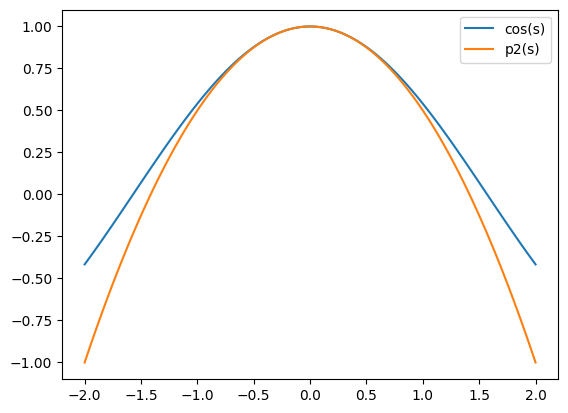

In [ ]:
import matplotlib.pyplot as plt

s=np.linspace(-2,2,100)
y=p(1,s)

plt.plot(s,np.cos(s),label='cos(s)')
plt.plot(s,y,label='p2(s)')
plt.legend()
plt.show()

Observe que a aproximação melhora, quando $n$ cresce.

Veja o caso $2n=4$, $2n=6$, $2n=8$e $2n=10$.

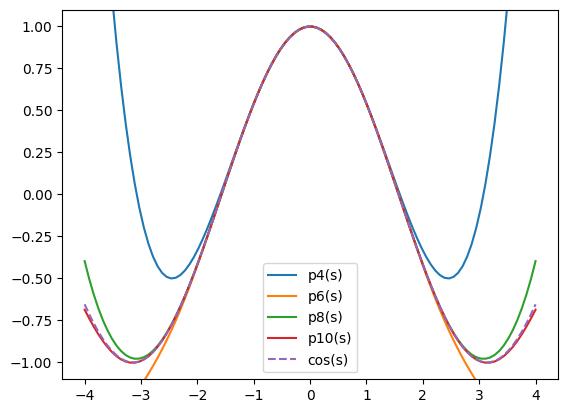

In [ ]:
s=np.linspace(-4,4,100)
plt.plot(s,p(2,s),label='p4(s)')
plt.plot(s,p(3,s),label='p6(s)')
plt.plot(s,p(4,s),label='p8(s)')
plt.plot(s,p(5,s),label='p10(s)')
plt.plot(s,np.cos(s),'--',label='cos(s)')
plt.ylim(-1.1,1.1)
plt.legend()
plt.show()

Vejamos o erro $\cos(s)-p_{10}(s)$, para $s\in \left[-\pi,\pi\right]$:

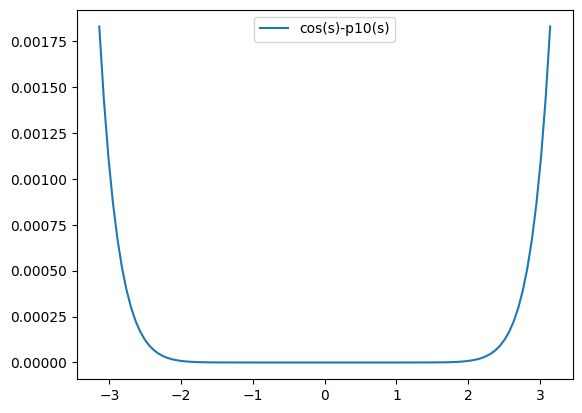

In [ ]:
s=np.linspace(-np.pi,np.pi,100)
plt.plot(s,np.cos(s)-p(5,s),label='cos(s)-p10(s)')
plt.legend()
plt.show()

Podemos então definir uma aproximação para $f(x)=cos(x)$ por meio de $p_{10}(x)$, lembrando que $$\cos(x\pm \pi)=-\cos(x).$$

In [ ]:
def apropoli(s):
  q=np.pi
  if (abs(s)<=q):
    r=p(5,s)
  else:
    if (s>=q):
      r=-apropoli(s-q)
    else:
      r=-apropoli(s+q)
  return r

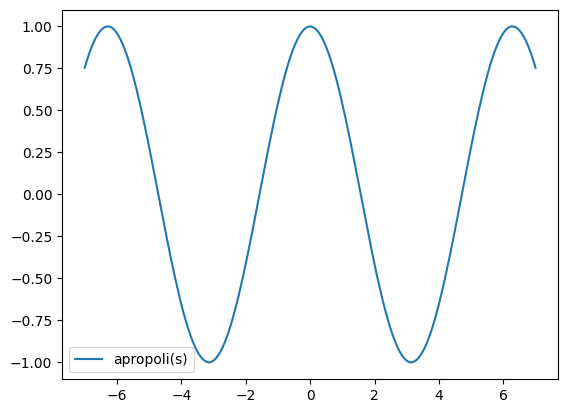

In [ ]:
s=np.linspace(-7,7,200)
y=[]
for i in range(len(s)):
  y.append(apropoli(s[i]))

plt.plot(s,y,label='apropoli(s)')
plt.legend()
plt.show()

#**Ordem 1**

Se tomarmos $n=1$ e $h\neq 0$ teremos então  
$$
\frac{f(a+h)-f(a)}{h}=f'(a) +\frac{1}{2!}f''(b)h,$$ e isso nos diz que $$
\frac{f(a+h)-f(a)}{h}\approx f'(a)$$ com erro proporcional $h\approx 0$.




Uma aplicação da derivada numérica é no funcionamento de radares móveis, como pode ser visto [neste vídeo](https://www.youtube.com/watch?v=vXw4i6_jjZY).

 Temos usado o caso $n=1$ no método de Euler. Entretanto, aqui $f(u)$ é conhecida e queremos conhecer $f'(u)$. No método de Euler é o contrário.

**Exemplo 2:**
Considere a função $$f(x)=\frac{1}{\ln(\tan(x))},\qquad x\in \left( \frac{\pi}{4},\frac{\pi}{2}\right),$$ e calcule analiticamente e numericamente $f'(1)$.

Lembre-se que, pela regra da cadeia, aplicada duas vezes, temos $$f'(x)=\frac{-1}{(\ln(\tan(x)))^2}\frac{1}{\tan(x)}\sec(x)^2$$ e assim,
$$f'(1)=\frac{-1}{(\ln(\tan(1)))^2}\frac{1}{\tan(1)}\sec(1)^2=-11.206552425345281...$$

Caso não se lembre dos conceitos usados anteriormente, ou queira apenas uma aproximação para $f'(1)$, testamos alguns valores de $h$.

Tomando $h=0.1$ temos que
$$\frac{f(a+h)-f(a)}{h}=-7.765505.$$
Tomando $h=0.01$ temos que
$$\frac{f(a+h)-f(a)}{h}=-10.724.$$
Tomando $h=0.001$ temos que
$$\frac{f(a+h)-f(a)}{h}= -11.15628
.$$
Tomando $h=0.0001$ temos que
$$\frac{f(a+h)-f(a)}{h}=  -11.2015
.$$

Isso sugere que para essa função, podemos facilmente obter uma boa aproximação para $f'(1)$ com $h\leq 0.0001$.


Você pode brincar com valores de $h$ no código que segue:

In [ ]:
def f(x):
  p=np.log(np.tan(x))
  return 1/p

In [ ]:
h=10**(-5)
a=1

df=(f(a+h)-f(a))/h

df

-11.206047358536251

**Ordem 2**

Podemos melhorar este método de aproximação de derivadas numericamente tomando $n=2$.

Nesse caso usamos as seguintes expressões advindas do polinômio de Taylor de $f(x)$:
$$
f(a+h)=f(a)+ f'(a) h+\frac{1}{2!}f''(a)h^2+\frac{1}{3!}f'''(b)h^3$$ e
$$
f(a-h)=f(a)- f'(a) h+\frac{1}{2!}f''(a)h^2-\frac{1}{3!}f'''(c)h^3,$$ para algum $b,\,c\in (a-r,a+r)$.

Logo,
$$
\frac{f(a+h)-f(a-h)}{2h}=f'(a)+\frac{f'''(b)+f'''(c)}{2.3!}h^2$$

Assim,
$$
\frac{f(a+h)-f(a-h)}{2h}\approx f'(a),\tag{*}$$ com erro $$\frac{f'''(b)+f'''(c)}{2.3!}h^2=\frac{f'''(d)}{3!}h^2$$ que é proporcional $h^2\approx 0$.

Se ao invés de subtrairmos as expressão nós as somarmos obtemos

$$
\frac{f(a+h)-2f(a)+f(a-h)}{h^2}=f''(a)+\frac{f'''(b)-f'''(c)}{3!}h.$$

E segue que,
$$
\frac{f(a+h)-2f(a)+f(a-h)}{h^2}\approx f''(a) $$ com erro $$\frac{f'''(b)-f'''(c)}{3!}h$$ que é proporcional $h\approx 0$.



**Exemplo 3**

Consideramos novamente a função $$f(x)=\frac{1}{\ln(\tan(x))},\qquad x\in \left( \frac{\pi}{4},\frac{\pi}{2}\right),$$ e calculamos numericamente $f'(1)$.

Para estudarmos a aproximação numérica testamos alguns valores de $h$.
Tomando $h=0.1$ temos que
$$\frac{f(a+h)-f(a-h)}{2h}=-14.21946
.$$
Tomando $h=0.01$ temos que
$$\frac{f(a+h)-f(a-h)}{2h}=-11.23019.$$
Tomando $h=0.001$ temos que
$$\frac{f(a+h)-f(a-h)}{2h}= -11.20679
.$$
Tomando $h=0.0001$ temos que
$$\frac{f(a+h)-f(a-h)}{2h}=  -11.206554784370937
.$$

Isso sugere que para essa função, podemos facilmente obter uma aproximação melhor que a anterior para $f'(1)$ com $h\leq 0.001$.

In [ ]:
h=10**(-5)
a=1

df=(f(a+h)-f(a-h))/(2*h)

df

-11.20655244895019

Deixo para vocês a verificação da estimativa de $f''(1)$:

In [ ]:
d2f=(f(a+h)-2*f(a)+f(a-h))/(h**2)
d2f

101.01808278761835

**Ordem 4**

Considerando agora $n=3$ no polinômio de Taylor pode-se justificar a seguinte expressão
$$f'(a)\approx \frac{-f(a+2h)+8f(a+h)-8f(a-h)+f(a-2h)}{12h},$$ com erro $$\frac{1}{30}f^{(5)}(c)h^4,$$ que é proporcional a $h^4\approx 0$, para a aproximação numérica de $f'(1)$ para $f(x)$ como nos dois últimos exemplos.

Deixamos a verificação para o leitor.

Para que valores de $h$ podemos considerar a aproximação boa?


**Exemplo 4**

Considere a função $$f(x)=\frac{1}{\ln(\tan(x))},\qquad x\in \left( \frac{\pi}{4},\frac{\pi}{2}\right),$$ e calcule analiticamente e numericamente $f'(1)$.

Lembre-se que, pela regra da cadeia, aplicada duas vezes, temos $$f'(x)=\frac{-1}{(\ln(\tan(x)))^2}\frac{1}{\tan(x)}\sec(x)^2.$$

Agora resolva a equação $$f(x)=2,$$ pelo método de Newton.

a) Usando a expressão analiítica para $f'(x)$;

b) usando uma aproximação para $f'(x)$.

c) Comparare as aproximações obtidas, com o mesmo passo $h$ e mesmo número de itereções $n$.

#**a)**


Para o item a) é preciso inserir $f'(x)$ na calculadora:

In [ ]:
def df(x):
  p=-(f(x)**2)*(1/np.tan(x))*(np.cos(x))**(-2)
  return p

Agora vamos iniciar com $h=1$ e $x_0=1$, uma vez que

In [ ]:
x0=1
h=1
f(x0)

2.257220556785886

O método de Newton toma a forma $$x_{i+1}=x_i-h\frac{f(x_i)-2}{f'(x_i)}:$$

In [ ]:
x1=x0-h*(f(x0)-2)/df(x0)

E temos

In [ ]:
x1, f(x1)

(1.022952692944544, 2.024032319869115)

Repetindo mais 3 vezes, ou tomando $n=4$:

In [ ]:
n=4
x=[x0,x1]
for i in range(1,n):
  x.append(x[i]-h*(f(x[i])-2)/df(x[i]))

x,f(x)

([1,
  1.022952692944544,
  1.0255609548040376,
  1.025588699892594,
  1.025588702964313],
 array([2.25722056, 2.02403232, 2.00025034, 2.00000003, 2.        ]))

O que nps dá

In [ ]:
x[4]

1.025588702964313

Como aproximação da solução.

#**b)**


Para o item b) é preciso inserir uma aproximação para $f'(x)$ na calculadora. Vamos usar a aproxiamção dada na Expressão $(*)$, trocando $h$ por $h_d=10^{-3}$:

In [ ]:
hd=10**(-3)

def apdf(x):
  p=(f(x+hd)-f(x-hd))/(2*hd)
  return p

Agora vamos iniciar com $h=1$ e $x_0=1$.

O método de Newton toma a forma aproximada
$$x_{i+1}=x_i-h\frac{f(x_i)-2}{\frac{f(x+h_d)-f(x-h_d)}{2h_d}}:$$

In [ ]:
x1=x0-h*(f(x0)-2)/apdf(x0)

E temos

In [ ]:
x1, f(x1)

(1.0229522097801218, 2.0240367717168297)

Repetindo mais 3 vezes, ou tomando $n=4$:

In [ ]:
n=4
x=[x0,x1]
for i in range(1,n):
  x.append(x[i]-h*(f(x[i])-2)/apdf(x[i]))

x,f(x)

([1,
  1.0229522097801218,
  1.0255609001230517,
  1.0255886994168708,
  1.0255887029642539],
 array([2.25722056, 2.02403677, 2.00025084, 2.00000003, 2.        ]))

O que nps dá

In [ ]:
x[4]

1.0255887029642539

Como aproximação da solução.

No item c) basta notar que a diferença foi muito pequena.

#**Várias variáveis**

Podemos considerar a derivada parcial de uma função $f(x)$, em relação à coordenada $x_i$, como a derivada da função $g(t)=f(x_1,\,\ldots,x_{i-1},\,t,\,x_{i+1},\ldots,x_n)$, em $t=x_i$, quando $x=(x_1,\,\ldots,x_{i-1},\,x_i,\,x_{i+1},\ldots,x_n)$.

Por exemplo,
$$\frac{\partial f(x)}{\partial x_1}\approx \frac{g(t+h)-g(t-h)}{2h}=\frac{f(x_1,\,\ldots,x_{i-1},\,t+h,\,x_{i+1},\ldots,x_n)-f(x_1,\,\ldots,x_{i-1},\,t-h,\,x_{i+1},\ldots,x_n)}{2h}.$$





**Exemplo 5**

Use algum dos métodos que mencionamos para aproximar $$\frac{\partial f(x,y)}{\partial x},\qquad  \frac{\partial^2 f(x,y)}{\partial x\partial y} \quad e \quad \frac{\partial f(x,y)}{\partial y},$$ para $$(x,y)=(1,2)\quad e\quad f(x,y)=x^2+y^2.$$
Para que valores de $h$ podemos considerar a aproximação boa?

In [2]:
def f(x,y):
  return x**2+y**2

Vamos tomar $h=10^{-4}$ para a aproximação das derivadas parciais.

In [8]:
h=10**(-4)

def adfx(x,y): # Aproximação de derivada parcial de f(x,y), em relação a x. Ordem 1.
  p=(f(x+h,y)-f(x,y))/h
  return p

def adfy(x,y): # Aproximação de derivada parcial de f(x,y), em relação a y. Ordem 1.
  p=(f(x,y+h)-f(x,y))/h
  return p

In [9]:
adfx(1,1), adfy(1,1)

(2.000099999999172, 2.000099999999172)

Outra aproximação:

In [10]:
def sadfx(x,y): # Aproximação de derivada parcial de f(x,y), em relação a x. Ordem 2.
  p=(f(x+h,y)-f(x-h,y))/(2*h)
  return p

def sadfy(x,y): # Aproximação de derivada parcial de f(x,y), em relação a y. Ordem 2.
  p=(f(x,y+h)-f(x,y-h))/(2*h)
  return p

In [11]:
sadfx(1,1), sadfy(1,1)

(1.9999999999997797, 1.9999999999997797)

#**Os métodos de Runge-Kutta**

Podemos usar a fórmula de Taylor $(1)$ para fazer aproximações para $f(t)$ em vez de aproximar as derivadas, como fizemos anteriormente, mas agora tratamos do caso em que conhecemos $$\begin{cases}y'(t)&=&F(t,y(t))\\y(t_0)&=&y_0\end{cases}$$ e não conhecemos a expressão para $y=f(t)$.
Nesse caso, podemos escrever
$$y(a+h)=y(a)+ F(a,y(a)) h+\frac{1}{2!}\frac{d\,F(a,y(a))}{dt}h^2+\cdots +\frac{1}{n!}\frac{d^{n-1}\,F(a,y(a))}{dt^{n-1}}h^n+E(h),$$ tendo em mente que $$\frac{d^{j-1}\,F(a,y(a))}{dt^{j-1}}=y^{(j)}(a),$$
em que $$E(h)=\frac{1}{(n+1)!}\frac{d^{n}\,F(b,y(b))}{dt^{n}}h^{n+1},$$ para algum $b\in (a,a+h)$, representa o erro cometido na aproximação de $y(t)$ pelo polinômio de Taylor de ordem $n$ de $f(t)$, que toma a forma  $$p(h)=y(a)+ F(a,y(a)) h+\frac{1}{2!}\frac{d\,F(a,y(a))}{dt}h^2+\cdots +\frac{1}{n!}\frac{d^{n-1}\,F(a,y(a))}{dt^{n-1}}h^n.$$ Sendo assim, supondo conhecidas $y(a)$ e as derivadas $y^{(i)}(a)$, para $i=1,\,2,\,\ldots n$, podemos estimar o valor de $y(a+h)$, como
$$y(a+h)\approx y(a)+ F(a,y(a)) h+\frac{1}{2!}\frac{d\,F(a,y(a))}{dt}h^2+\cdots +\frac{1}{n!}\frac{d^{n-1}\,F(a,y(a))}{dt^{n-1}}h^n, $$ com erro $E(h)$.

**Obs:** Cabe observar que  vale a igualdade $$F(t,y(t))=F(g(t))=F\circ g(t),$$ para $g(t)=(t,y(t))$.

Segue então que $$\frac{d\,F(a,y(a))}{dt}=F'({\bf a})g'(a)= \nabla F({\bf a})\cdot (1,y'(a))= \nabla F({\bf a})\cdot (1,F(a,y(a)))=\nabla F({\bf a})\cdot(1,F({\bf a})),$$ sendo  $ {\bf a}=(a,y(a))$, uma vez que $g'(t)=(1,y'(t))$.

Dessa forma, temos, por exemplo, que
\begin{eqnarray*}\frac{d^2\,F(t,y(t))}{dt^2}&=&\frac{d}{dt}\left[F'(g(t))g'(t)\right]\\\\&=&\left[F''(g(t))g'(t)\right]g'(t)+F'(g(t))g''(t)\\\\&=&\left( HF(g(t))\left[\begin{array}{cc}1\\F(t,y(t))\end{array}\right)\cdot(1,F(t,y(t)))\right) + \nabla F(g(t))\cdot (0,y''(t))\end{eqnarray*}
	tendo em mente que $$g''(t)=(0,y''(t)),\qquad y''(t)=\frac{d\,F(t,y(t))}{dt}.$$

Para obtermos métodos com ordem maior que a do método de Euler, podemos usar as ideias de  [Runge e Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

Para exemplificar a ideia usada vamos discutir um pouco sobre métodos de ordem 2, ou seja, em que consideramos a expressão
$$
	y(a+h)=y(a)+ F(a,y(a)) h+\frac{1}{2!}\frac{d\,F(a,y(a))}{dt}h^2+E(h)
$$ mas evitamos o cálculo da expressão $$\frac{d\,F(t,y(t))}{dt}=y''(t).$$
Tomamos a aproximação
$$ y(a+h)\approx y(a)+ h \left[\alpha_1 F(a,y(a)) +\alpha_2F(a+\beta h,y(a)+\delta h F(a,y(a)))\right]$$ e forçamos a escolha de $\alpha_1$, $\alpha_2$, $\beta$ e $\delta$ de tal forma que o erro cometido nessa aproximação  seja comparável a $E(h)$.

Isso é feito usando o polinômio de Taylor de $$F(a+\beta h,y(a)+\delta h F(a,y(a)))=F({\bf a+h}),
$$ até a ordem 1, sendo $ {\bf a}=(a,y(a))$ e $ {\bf h}=(\beta h,\delta h F(a,y(a)))$.

Uma possibilidade de escolha é tomar $$\beta =\delta,\quad \alpha_2=\frac{1}{2\beta},\quad \alpha_1=1-\alpha_2.\tag{**}$$

Como exemplo, tomamos $\delta=1$ e usamos a notação
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F(x_p+h,y_p+hk_1)\end{eqnarray*}
obtemos um método de Runge-Kutta de ordem 2, ou seja, com erro na estimativa de $y(b)$ proporcional a $h^2=((b-a)/n)^2$, dado por $$	y(x_p+h)\,\approx\,y_{p+1}=y_p+\frac{h}{2}\left(k_1+k_2\right),$$ para $p=1,\,2,\,\ldots n-1$. Esse método é conhecido como método de Euler melhorado (veja o porque do nome no Exercício \ref{trapezio}).

Se tomarmos tomarmos $\beta=1/2$ e usamos a notação
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F\left(x_p+\frac{h}{2},y_p+\frac{h}{2}k_1\right)\end{eqnarray*}
obtemos um método de Runge-Kutta de ordem 2, dado por $$	y(x_p+h)\,\approx\,y_{p+1}=y_p+hk_2.$$
Esse método é conhecido como método do ponto médio.

Tomando ainda $\beta=3/4$ temos o método de Ralston
	\begin{eqnarray*}
		x_p&=&t_0+ph\\
		k_1&=&F(x_p,y_p)\\
		k_2&=&F\left(x_p+\frac{2h}{3},y_p+\frac{2h}{3}k_1\right)\\	y(x_p+h)\,\approx\,y_{p+1}&=&y_p+\frac{h}{4}(k_1+3k_2)\end{eqnarray*}



Usando aproximações por funções compostas e usando mais derivadas de $y(t)$, podemos produzir métodos de ordens maiores.
Apresentamos dois exemplos de métodos de ordens 3 e 4.

Um método de Runge-Kutta de ordem 3 é o método de Nystrom dado por
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F(x_p+2h/3,y_p+2hk_1/3)\\
	k_3&=&F(x_p+2h/3,y_p+2hk_2/3)\\
	y(x_p+h)\,\approx\,y_{p+1}&=&y_p+\frac{h}{4}\left(k_1+\frac{2}{3}(k_2+k_3)\right)
\end{eqnarray*}

Um método de Runge-Kutta de ordem 4 é dado por
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F(x_p+h/3,y_p+hk_1/3)\\
	k_3&=&F(x_p+2h/3,y_p-hk_1/3+hk_2)\\
	k_4&=&F(x_p+h,y_p+hk_1-hk_2+hk_3)\\
	y(x_p+h)\,\approx\,y_{p+1}&=&y_p+\frac{h}{8}\left(k_1+3(k_2+k_3)+k_4\right)
\end{eqnarray*}




**Obs:** Segue que \begin{eqnarray*}F({\bf a+h})&=&F({\bf a})+\langle \nabla F({\bf a}),{\bf h}\rangle +E({\bf h})\\&=&F({\bf a})+\langle \nabla F({\bf a}),(\beta h ,\delta h F(a,y(a)))\rangle +E({\bf h})\\&=&F({\bf a})+h\langle \nabla F({\bf a}),(\beta ,\delta F({\bf a}))\rangle +h^2(\cdots)\end{eqnarray*} sendo $ {\bf h}=(\beta h,\delta h F(a,y(a)))=h(\beta,\delta F({\bf a}))$.

Com isso em mente, temos $$	y(a+h)=y(a)+ F({\bf a}) h+\frac{1}{2!}\langle \nabla F({\bf a}),(1,F({\bf a}))\rangle h^2+h^3(\cdots )$$ que pode ser pode ser escrita como \begin{eqnarray*} y(a+h)&\approx& y(a)+ h \left[\alpha_1 F(a,y(a)) +\alpha_2F(a+\beta h,y(a)+\delta h F(a,y(a)))\right]\\&=&  y(a)+ h \left[\alpha_1 F({\bf a}) +\alpha_2F({\bf a+h})\right]
\\&=&  y(a)+ h \left[\alpha_1 F({\bf a}) +\alpha_2\left(F({\bf a})+h\langle \nabla F({\bf a}),(\beta ,\delta F({\bf a}))\rangle +h^2(\cdots)\right)\right]
\\&=&  y(a)+ (\alpha_1+\alpha_2) F({\bf a})h +\alpha_2 \langle \nabla F({\bf a}),(\beta ,\delta F({\bf a}))\rangle h^2  +h^3(\cdots) \end{eqnarray*}

Como queremos aproximar $y(a+h)$ com erro proporcional a $h^3$, em cada passo, devemos satisfazer às igualdades $$\alpha_1+\alpha_2=1,\qquad \alpha_2\beta=\frac{1}{2!}=\alpha_2\delta.$$ Isso nos leva a escolher às igualdades da Expressão $(**)$.
